In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets.base import get_data_home 
print (get_data_home())

C:\Users\nEW u\scikit_learn_data


In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape,y.shape

((70000, 784), (70000,))

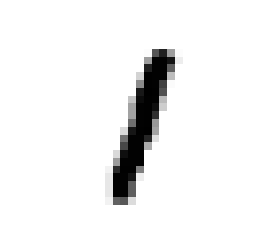

In [6]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[6980] 
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off") 
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=42)

In [9]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((52500, 784), (17500, 784), (52500,), (17500,))

In [10]:
ytrain5 = ytrain == 1

In [11]:
ytrain5[:10]

array([False,  True, False, False, False, False, False, False, False,
       False])

In [12]:
(ytrain==1)[:10]

array([False,  True, False, False, False, False, False, False, False,
       False])

In [13]:
from sklearn.linear_model import SGDClassifier

In [14]:
sgd = SGDClassifier(random_state=42)

In [15]:
sgd.fit(Xtrain,ytrain5)

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
sgd.predict([some_digit])

array([ True])

In [17]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(Xtrain, ytrain5): 
    clone_clf = clone(sgd) 
    X_train_folds = Xtrain[train_index] 
    y_train_folds = ytrain5[train_index]
    X_test_fold = Xtrain[test_index] 
    y_test_fold = ytrain5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds) 
    y_pred = clone_clf.predict(X_test_fold) 
    n_correct = sum(y_pred == y_test_fold) 
    print(n_correct / len(y_pred))

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9905719673161534


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9818857142857143


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.98914223669924


In [163]:
ytrain5[train_index]

array([False,  True, False, ...,  True,  True,  True])

In [164]:
y_train_folds

array([False,  True, False, ...,  True,  True,  True])

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(sgd, Xtrain, ytrain5, cv=3, scoring="accuracy")

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max

array([0.99057197, 0.98188571, 0.98914224])

In [20]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [22]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, Xtrain, ytrain5, cv=3, scoring="accuracy")

array([0.88771429, 0.88817143, 0.88457143])

In [10]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [42]:
classifier = Sequential()

In [43]:
classifier.add(Dense(activation='relu',units=32,input_dim=784))
classifier.add(Dropout(0.1))

In [44]:
classifier.add(Dense(activation='relu',units=64))
classifier.add(Dropout(0.1))

In [50]:
classifier.add(Dense(activation='relu',units=16))
classifier.add(Dropout(0.1))

In [51]:
classifier.add(Dense(activation='softmax',units=10))

In [52]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

f = onehotencoder.fit_transform(ytrain.reshape(-1,1)).toarray()

ytrainhot = f

ytrainhot[:10]

C:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [54]:
classifier.fit(Xtrain,ytrainhot,batch_size=400,epochs=100)

Epoch 1/100
52500/52500 [==============================] - 4s 71us/step - loss: 2.4324 - acc: 0.1639
Epoch 2/100
52500/52500 [==============================] - 2s 40us/step - loss: 1.8806 - acc: 0.3171
Epoch 3/100
52500/52500 [==============================] - 2s 37us/step - loss: 1.6152 - acc: 0.3588
Epoch 4/100
52500/52500 [==============================] - 2s 37us/step - loss: 1.5044 - acc: 0.3718
Epoch 5/100
52500/52500 [==============================] - 2s 37us/step - loss: 1.4555 - acc: 0.3842
Epoch 6/100
52500/52500 [==============================] - 2s 37us/step - loss: 1.4058 - acc: 0.4025
Epoch 7/100
52500/52500 [==============================] - 2s 37us/step - loss: 1.3133 - acc: 0.4556
Epoch 8/100
52500/52500 [==============================] - 2s 36us/step - loss: 1.1485 - acc: 0.5146
Epoch 9/100
52500/52500 [==============================] - 2s 36us/step - loss: 1.0632 - acc: 0.5389
Epoch 10/100
52500/52500 [==============================] - 2s 36us/step - loss: 1.0373 - a

52500/52500 [==============================] - 2s 37us/step - loss: 0.2620 - acc: 0.9292
Epoch 81/100
52500/52500 [==============================] - 2s 37us/step - loss: 0.2779 - acc: 0.9246
Epoch 82/100
52500/52500 [==============================] - 2s 37us/step - loss: 0.2627 - acc: 0.9283
Epoch 83/100
52500/52500 [==============================] - 2s 37us/step - loss: 0.2555 - acc: 0.9296
Epoch 84/100
52500/52500 [==============================] - 2s 37us/step - loss: 0.2528 - acc: 0.9328
Epoch 85/100
52500/52500 [==============================] - 2s 37us/step - loss: 0.2569 - acc: 0.9301
Epoch 86/100
52500/52500 [==============================] - 2s 39us/step - loss: 0.2565 - acc: 0.9306
Epoch 87/100
52500/52500 [==============================] - 2s 37us/step - loss: 0.2502 - acc: 0.9313
Epoch 88/100
52500/52500 [==============================] - 2s 36us/step - loss: 0.2559 - acc: 0.9307
Epoch 89/100
52500/52500 [==============================] - 2s 42us/step - loss: 0.2521 - acc: 

In [55]:
pred = classifier.predict_classes(Xtest)

In [56]:
pred[:20]

array([7, 8, 6, 5, 7, 1, 3, 3, 0, 9, 4, 5, 4, 2, 0, 5, 0, 5, 3, 1],
      dtype=int64)

In [57]:
ytest[:20].astype('int64')

array([7, 8, 6, 5, 7, 1, 3, 3, 0, 9, 4, 5, 0, 2, 0, 5, 0, 5, 3, 1],
      dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
s=0
for i in range(10):
    s+=confusion_matrix(ytest,pred)[i][i]
s/17500

0.9477142857142857

In [60]:
confusion_matrix(ytest,pred)

array([[1644,    0,    1,    1,   11,    0,    8,    0,   12,    0],
       [   0, 1897,    8,   12,    0,    0,    1,    5,    8,    4],
       [  15,    6, 1686,   19,    6,    0,    8,   12,   12,    3],
       [   4,    0,   24, 1673,    2,   21,    1,   13,   10,   18],
       [   2,    3,    4,    2, 1564,    0,    6,    7,    7,   96],
       [   8,    4,    3,   30,    8, 1524,   22,    2,   21,   31],
       [  11,    2,    4,    1,   26,    5, 1691,    0,   11,    3],
       [   5,    2,   15,   14,    5,    1,    1, 1734,    7,   62],
       [   9,   10,    9,    8,   18,   17,    9,    1, 1590,   31],
       [   9,    3,    3,   14,   39,    9,    0,   31,   19, 1582]],
      dtype=int64)